# Trong bảng AgentTasks_Raw, một agent có thể thực hiện nhiều task, nên khóa chính là (agent_id, task_id)
# agent_id chưa đủ làm khóa chính vì một agent có thể thực hiện nhiều task.
# task_id chưa đủ làm khóa chính vì một task có thể được thực hiện bởi nhiều agents.
# Do đó, (agent_id, task_id) là khóa chính.
# 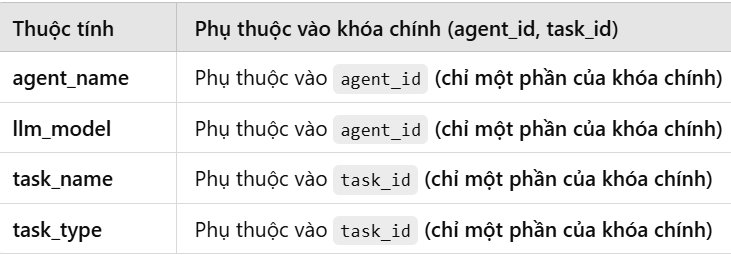
agent_name	Phụ thuộc vào agent_id (chỉ một phần của khóa chính)
llm_model	Phụ thuộc vào agent_id (chỉ một phần của khóa chính)
task_name	Phụ thuộc vào task_id (chỉ một phần của khóa chính)
task_type	Phụ thuộc vào task_id (chỉ một phần của khóa chính)


# Chuẩn hóa bảng về chuẩn 2NF
# 1. Tạo một bảng chỉ chứa thông tin về agents (Agents)
# 2. Tạo một bảng chỉ chứa thông tin về tasks (Tasks) 
# 3. Tạo bảng mới (Agent_Tasks) chỉ chứa quan hệ giữa agent_id và task_id
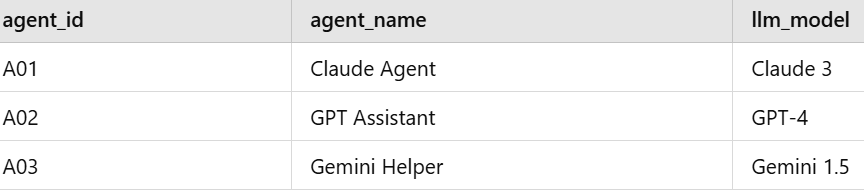
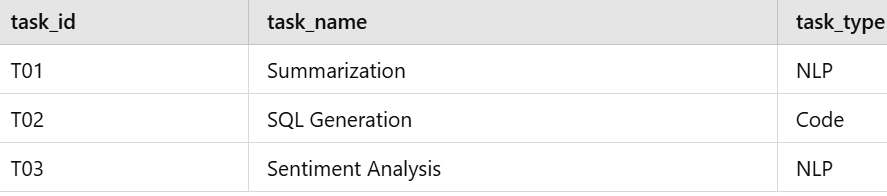
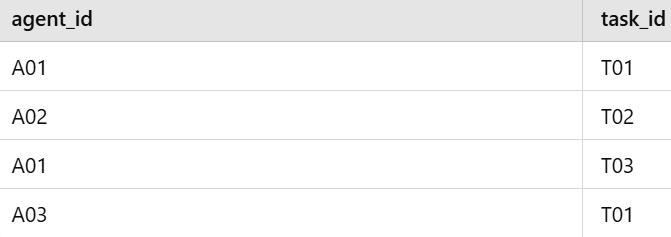


In [1]:
import mysql.connector 

connection = mysql.connector.connect(
    host="127.0.0.1",     
    user="root",         
    password="2011DongBaLiem@",
    database="chuanhoacsdl")
cursor = connection.cursor()

In [5]:
cursor.execute("""
create table if not exists Agents(
    agent_id VARCHAR(10) PRIMARY KEY,
    agent_name VARCHAR(100),
    llm_model VARCHAR(50)
)ENGINE=InnoDB;
""")

cursor.execute("""
create table if not exists Tasks(
    task_id VARCHAR(10) PRIMARY KEY,
    task_name VARCHAR(100),
    task_type VARCHAR(50)
) ENGINE=InnoDB;
""")

cursor.execute("""
create table if not exists AgentTasks(
    agent_id VARCHAR(10),
    task_id VARCHAR(10),
    PRIMARY KEY(agent_id, task_id),
    FOREIGN KEY(agent_id) REFERENCES Agents(agent_id),
    FOREIGN KEY(task_id) REFERENCES Tasks(task_id)
) ENGINE=InnoDB;
""")
connection.commit()

In [6]:
cursor.execute("""
INSERT INTO Agents(agent_id, agent_name, llm_model) VALUES
    ('A01', 'Claude Agent', 'Claude 3'),
    ('A02', 'GPT Assistant', 'GPT-4'),
    ('A01', 'Claude Agent', 'Claude 3'),
    ('A03', 'Gemini Helper', 'Gemini 1.5')
;
""")

cursor.execute("""
INSERT INTO Tasks(task_id, task_name, task_type) VALUES
    ('T01', 'Summarizatiion', 'NLP'),
    ('T02', 'SQL Generation', 'Code'),
    ('T03', 'Sentiment Analysis', 'NLP'),
    ('T01', 'Summarizatiion', 'NLP')
;    
""")

cursor.execute("""
INSERT INTO AgentTasks(agent_id, task_id) VALUES
    ('A01', 'T01'),
    ('A01', 'T03'),
    ('A02', 'T02'),
    ('A03', 'T01')
;
""")

connection.commit()

In [7]:
import pandas as pd

query="""
SELECT t.task_name, a.agent_name
FROM AgentTasks ata
JOIN Agents a ON a.agent_id = ata.agent_id
JOIN Tasks t ON t.task_id = ata.task_id
;
"""
connection.commit()
data=pd.read_sql_query(query, connection)
data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14772\1174695847.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data=pd.read_sql_query(query, connection)


,task_name,agent_name
0,Summarizatiion,Claude Agent
1,Sentiment Analysis,Claude Agent
2,SQL Generation,GPT Assistant
3,Summarizatiion,Gemini Helper


In [8]:
query="""
SELECT DISTINCT llm_model
FROM Agents;
"""

data=pd.read_sql_query(query, connection)
data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14772\3823964823.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data=pd.read_sql_query(query, connection)


,llm_model
0,Claude 3
1,GPT-4
2,Gemini 1.5


In [10]:
query= """
SELECT llm_model, count(*) AS num_agents
FROM Agents
GROUP BY llm_model;
"""
data=pd.read_sql_query(query, connection)
data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14772\3342931690.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data=pd.read_sql_query(query, connection)


,llm_model,num_agents
0,Claude 3,1
1,GPT-4,1
2,Gemini 1.5,1


In [12]:
query="""
SELECT task_type, count(1) AS count_task
FROM Tasks
GROUP BY task_type;
"""
data=pd.read_sql_query(query, connection)
data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14772\2736487638.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data=pd.read_sql_query(query, connection)


,task_type,count_task
0,NLP,2
1,Code,1


In [13]:
query="""
SELECT agent_name, llm_model
FROM Agents
WHERE llm_model LIKE 'G%';
"""
data=pd.read_sql_query(query, connection)
data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14772\3594432599.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data=pd.read_sql_query(query, connection)


,agent_name,llm_model
0,GPT Assistant,GPT-4
1,Gemini Helper,Gemini 1.5
